In [7]:
from Fig_climate_SC import *
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [22]:
def Rate(x, y):
    r = (y-x)/x
    return r

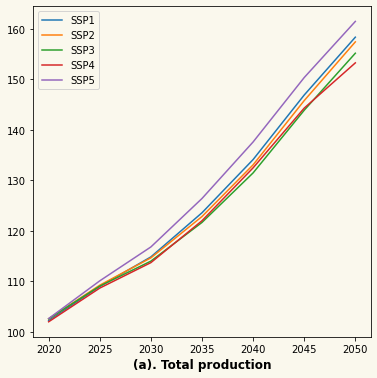

In [10]:
Scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
# Years = ['1990', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
Years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
title = ['(d). Irrigation', '(e). Fertilizer', '(f). GHG Emissions', '(b). Land', '(g). The global temperature increases','(a). Total production', '(c). Operation cost']

file_list = ['2_water.csv', '2_N2.csv', '2_emission.csv', '20220421_GCAM_totalarea.csv']

#rates = ['1_10_1_1', '1_1_0.5_1', '1_1_1_1', '1_1_1_10', '10_1_1_1']
rates = '1_1_1_1'
rate_legs = ['S1', 'S2', 'S0', 'S3', 'S4']

fig = plt.figure(figsize=(10, 10), facecolor='#faf8ed', constrained_layout=True)
gs = fig.add_gridspec(4, 2)

######################################################################################################################
f = '20220421_gcam_production.csv'
ax = fig.add_subplot(gs[0:2, 0])
avg = []
for s, scenario in enumerate(Scenarios):
    CSC = climateSC(Years, scenario, f[:-4])
    plot(ax, Years, CSC.data, label=scenario, title=title[5])
    avg.append(CSC.data.mean())
ax.legend(Scenarios, loc='best', facecolor='#faf8ed')

In [23]:
rates = []
for i in range(5):
    rates.append(Rate(avg[i], avg[4]))
rates

[0.01837373445953849,
 0.022366858876156456,
 0.03136896915594474,
 0.033047770477055684,
 0.0]

In [25]:
f = file_list[3]
ax = fig.add_subplot(gs[0, 1])
avg = []
for s, scenario in enumerate(Scenarios):
    CSC = climateSC(Years, scenario, f[:-4])
    plot(ax, Years, CSC.data, label=scenario, title=title[3])
    avg.append(CSC.data.mean())

rates = []
for i in range(5):
    rates.append(Rate(avg[i], avg[4]))
rates

<ipython-input-25-3c853c80f852>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[0, 1])


[0.010655944129138516,
 0.015103182063648302,
 0.021383028927766345,
 0.022607666376211293,
 0.0]

In [30]:
def Rate2(x, y):
    r = y/x
    return r

rates = ['1_10_1_1', '1_1_0.5_1', '1_1_1_1', '1_1_1_10', '10_1_1_1']
sc = 'SSP4'

ax = fig.add_subplot(gs[1, 1])
avg = []
res = pd.DataFrame(index = Years)
for j, rate in enumerate(rates):
    GRB = GRBResults(rate, sc)
    Y = GRB.Y['Cost_Total'].to_numpy()
    res[rate] = Y
res.iloc[:, 3] = res.iloc[:, 3] / 3.8
res.iloc[:, 4] = res.iloc[:, 4] / 1.5

res['mean'] = res.mean(axis=1)
res

rates = []
for i in range(5):
    rates.append(Rate2(res.iloc[:,-1][i], res.iloc[:,-1][4]))
rates

<ipython-input-30-f1d1d21dcff0>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[1, 1])


[2.2430285354585626,
 1.962299972760982,
 1.5934728270892629,
 1.2643368343685353,
 1.0]

In [31]:
f = file_list[0]
ax = fig.add_subplot(gs[2, 0])
avg = []
for s, scenario in enumerate(Scenarios):
    CSC = climateSC(Years, scenario, f[:-4])
    plot(ax, Years, CSC.data, label=scenario, title=title[0])
    avg.append(CSC.data.mean())

rates = []
for i in range(5):
    rates.append(Rate(avg[i], avg[4]))
rates

<ipython-input-31-56a640dfc7db>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[2, 0])


[0.030517319135716755,
 0.03545200116541146,
 0.052110947508676085,
 0.050296217115899065,
 0.0]

In [34]:
f = file_list[1]
ax = fig.add_subplot(gs[2, 1])
for s, scenario in enumerate(Scenarios):
    CSC = climateSC(Years, scenario, f[:-4])
    plot(ax, Years, CSC.data, label=scenario, title=title[1])

rates = []
for i in range(5):
    rates.append(Rate(avg[i], avg[4]))
rates

<ipython-input-34-951de55b43a8>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[2, 1])


[0.030517319135716755,
 0.03545200116541146,
 0.052110947508676085,
 0.050296217115899065,
 0.0]

In [38]:
f = file_list[2]
ax = fig.add_subplot(gs[3, 0])
for s, scenario in enumerate(Scenarios):
    CSC = climateSC(Years, scenario, f[:-4])
    plot(ax, Years, CSC.data, label=scenario, title=title[2])
rates = []
for i in range(5):
    rates.append(Rate(avg[i], avg[4]))
rates

<ipython-input-38-0960ffc09bce>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(gs[3, 0])


[0.030517319135716755,
 0.03545200116541146,
 0.052110947508676085,
 0.050296217115899065,
 0.0]